Nama Dataset : Recruitment Prediction

Goals : Create deep analytics to identify which variables affecting hiring decision and build model to predict hiring decision

About Dataset : Predict whether a candidate will be hired or not

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('recruitment_data.csv')

In [5]:
# cek imbalance pada label target hiring decision
print(df['HiringDecision'].value_counts())
# print presentase imbalance
print(df['HiringDecision'].value_counts(normalize=True) * 100)

HiringDecision
0    1035
1     465
Name: count, dtype: int64
HiringDecision
0    69.0
1    31.0
Name: proportion, dtype: float64


In [3]:
df.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1500 non-null   int64  
 1   Gender               1500 non-null   int64  
 2   EducationLevel       1500 non-null   int64  
 3   ExperienceYears      1500 non-null   int64  
 4   PreviousCompanies    1500 non-null   int64  
 5   DistanceFromCompany  1500 non-null   float64
 6   InterviewScore       1500 non-null   int64  
 7   SkillScore           1500 non-null   int64  
 8   PersonalityScore     1500 non-null   int64  
 9   RecruitmentStrategy  1500 non-null   int64  
 10  HiringDecision       1500 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 129.0 KB


In [4]:
df.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0



`Berikut merupakan List fitur :`
1. Age : Umur kandidat
2. Gender : Jenis kelamin kandidat (0 , 1) 
3. EducationLevel : Tingkat pendidikan kandidat (1 - 5)
4. ExperienceYears : Jumlah tahun pengalaman kandidat
5. PreviousCompanies : Jumlah perusahaan sebelumnya kandidat
6. DistanceFromCompany : Jarak dari rumah ke perusahaan 
7. InterviewScore : Skor wawancara kandidat (1 - 100)
8. SkillScore : Skor keterampilan kandidat (1 - 100)
9. PersonalityScore : Skor kepribadian kandidat (1 - 100)
10. RecruitmentStrategy : Strategi rekrutmen (1,2,3)

Label Target :
11. HiringDecision : Keputusan perekrutan (0 = Tidak, 1 = Ya)


In [5]:
# check for missing values
df.isnull().sum()


Age                    0
Gender                 0
EducationLevel         0
ExperienceYears        0
PreviousCompanies      0
DistanceFromCompany    0
InterviewScore         0
SkillScore             0
PersonalityScore       0
RecruitmentStrategy    0
HiringDecision         0
dtype: int64

In [6]:
# check duplicate rows
df.duplicated().sum()

np.int64(0)

In [7]:
# check distribusi kolom numerik
df.describe()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,35.148667,0.492000,2.188000,7.694000,3.00200,25.505379,50.564000,51.116000,49.387333,1.893333,0.310000
std,9.252728,0.500103,0.862449,4.641414,1.41067,14.567151,28.626215,29.353563,29.353201,0.689642,0.462647
min,20.000000,0.000000,1.000000,0.000000,1.00000,1.031376,0.000000,0.000000,0.000000,1.000000,0.000000
25%,27.000000,0.000000,2.000000,4.000000,2.00000,12.838851,25.000000,25.750000,23.000000,1.000000,0.000000
50%,35.000000,0.000000,2.000000,8.000000,3.00000,25.502239,52.000000,53.000000,49.000000,2.000000,0.000000
75%,43.000000,1.000000,3.000000,12.000000,4.00000,37.737996,75.000000,76.000000,76.000000,2.000000,1.000000
max,50.000000,1.000000,4.000000,15.000000,5.00000,50.992462,100.000000,100.000000,100.000000,3.000000,1.000000


In [8]:
# Fitur numerik dalam dataset ini meliputi \texttt{Age}, \texttt{ExperienceYears}, \texttt{PreviousCompanies}, \texttt{DistanceFromCompany}, \texttt{InterviewScore}, \texttt{SkillScore}, dan \texttt{PersonalityScore}. 
num_cols = ['Age', 'ExperienceYears', 'PreviousCompanies', 'DistanceFromCompany', 'InterviewScore', 'SkillScore', 'PersonalityScore']
cat_cols = ['Gender', 'EducationLevel', 'RecruitmentStrategy']
target_col = 'Hired'


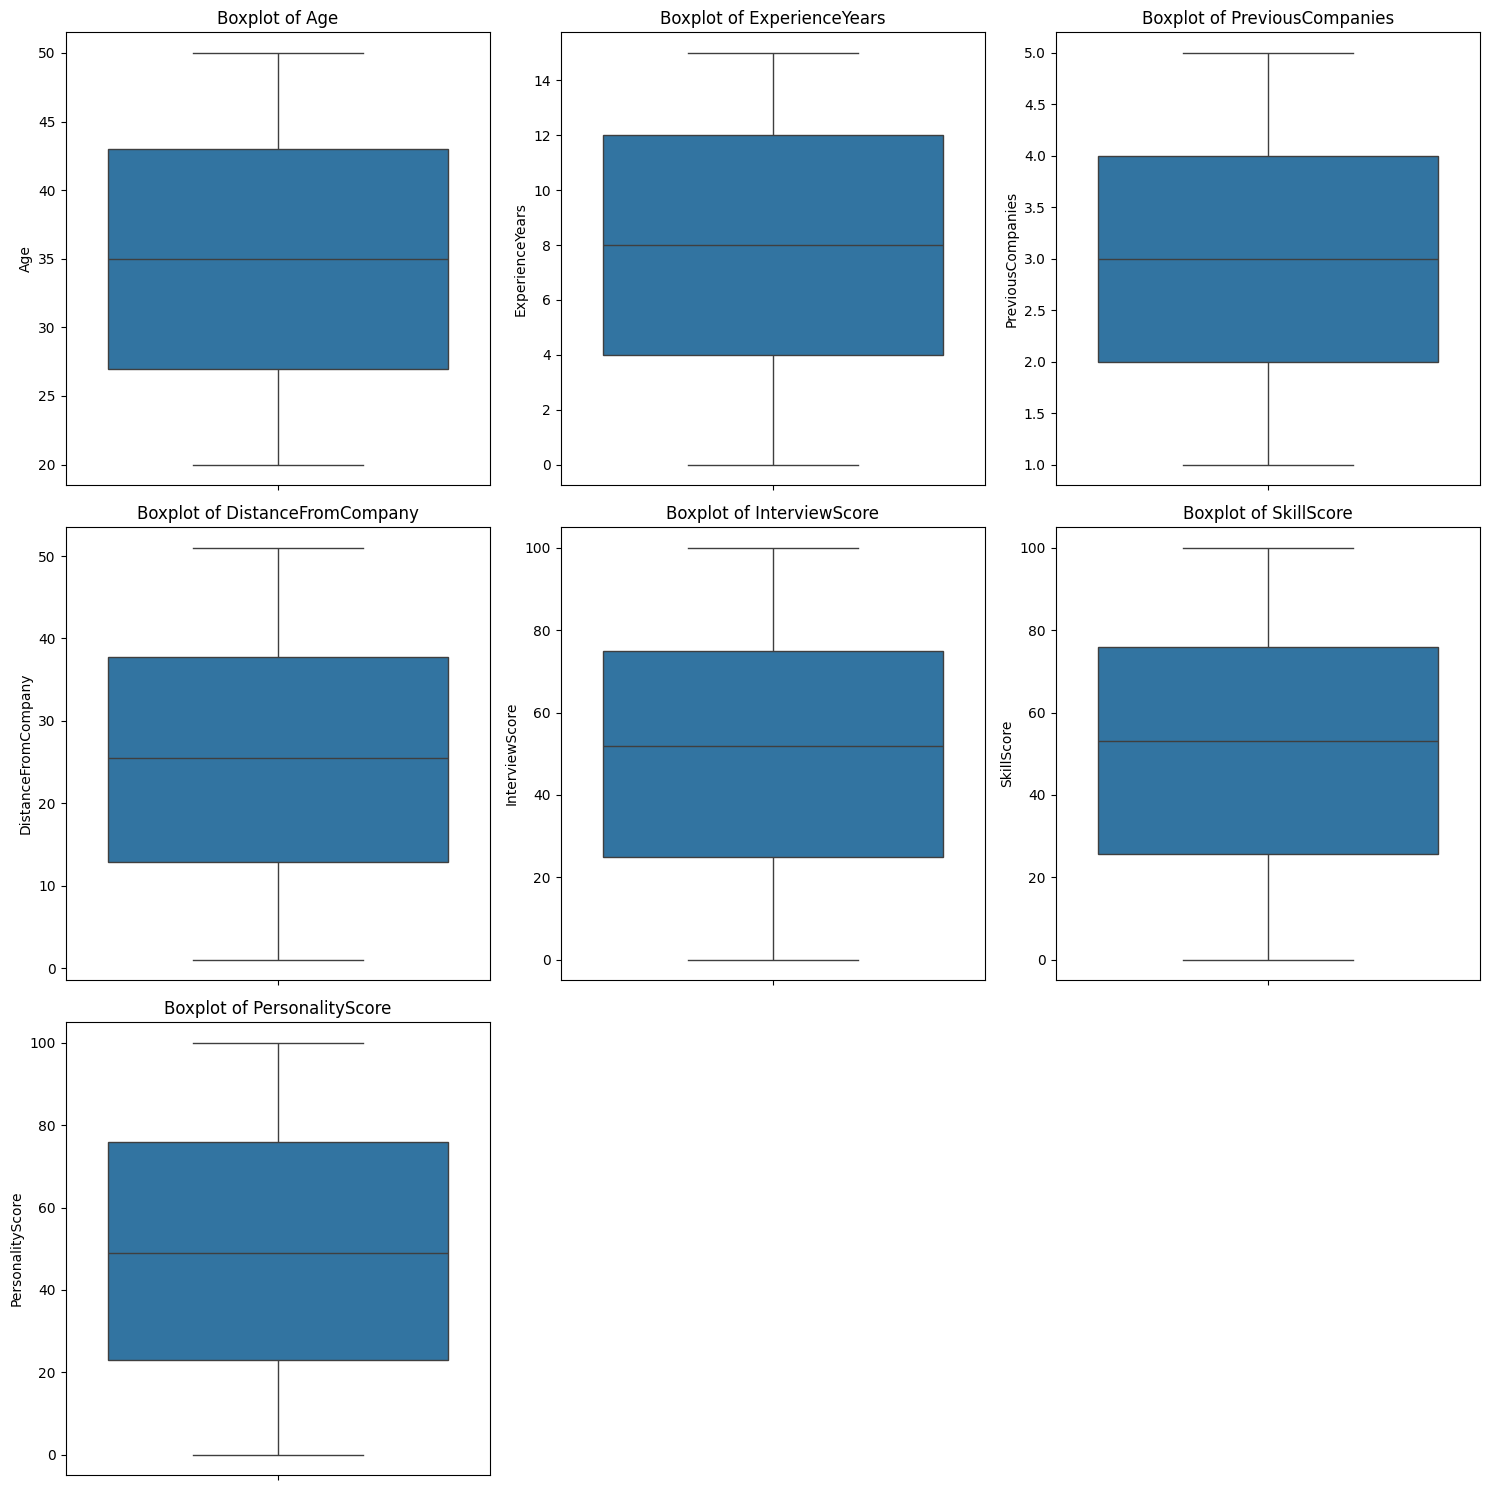

In [9]:
# buat boxplot 
n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel(col)
    axes[i].set_xlabel('')
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()



In [10]:
print("Numerical Features:", num_cols)
print("Categorical Features:", cat_cols)

Numerical Features: ['Age', 'ExperienceYears', 'PreviousCompanies', 'DistanceFromCompany', 'InterviewScore', 'SkillScore', 'PersonalityScore']
Categorical Features: ['Gender', 'EducationLevel', 'RecruitmentStrategy']


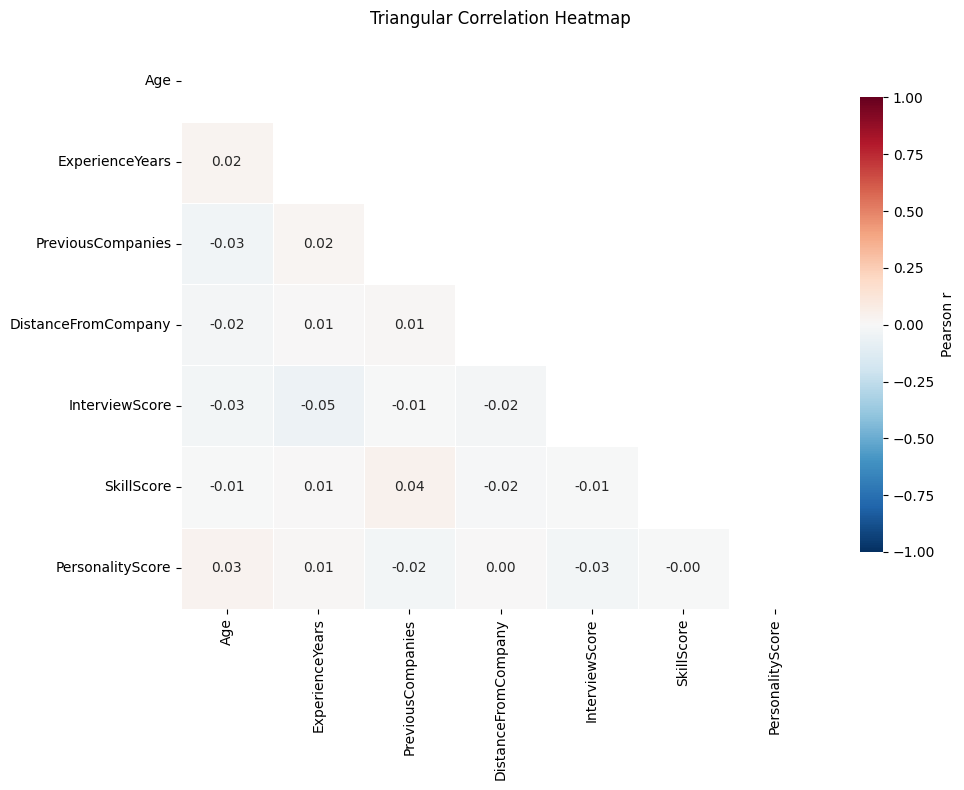

In [11]:


num_cols2 = ['Age','ExperienceYears','PreviousCompanies','DistanceFromCompany',
            'InterviewScore','SkillScore','PersonalityScore','HiringDecision']

# korelasi (Pearson). Jika hubungan cenderung monotonic non-linear, ganti ke method='spearman'
corr = df[num_cols].corr(method='spearman')

# buat mask segitiga atas
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    corr, 
    mask=mask,
    annot=True, fmt='.2f',
    vmin=-1, vmax=1,
    cmap='RdBu_r',
    linewidths=.5,
    cbar_kws={'shrink': .8, 'label': 'Pearson r'}
)

ax.set_title('Triangular Correlation Heatmap', pad=12)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


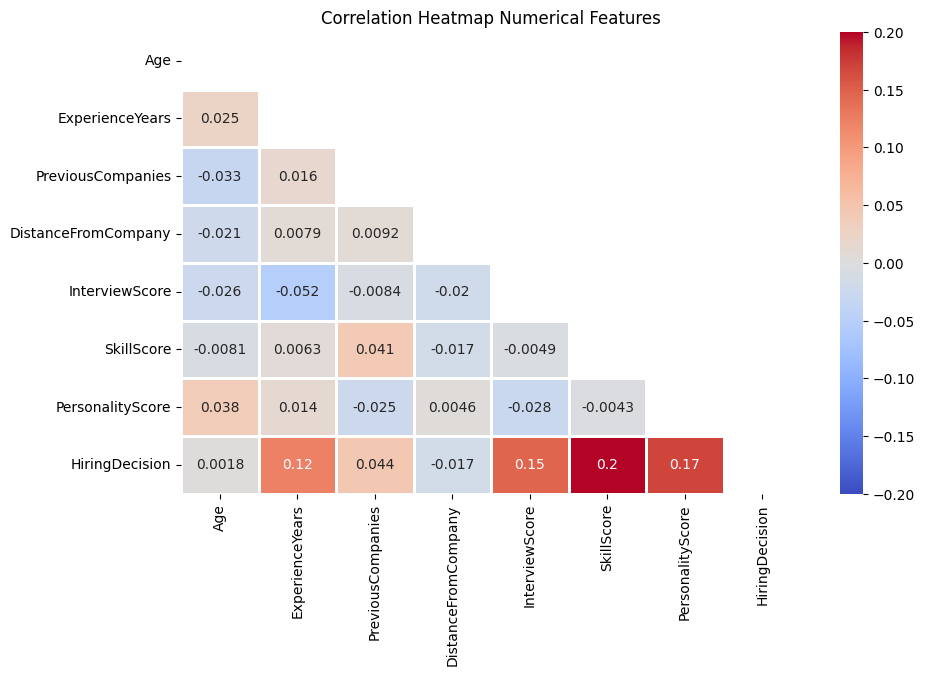

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# hitung korelasi
corr = df[num_cols2].corr()

# mask segitiga atas
mask = np.triu(np.ones_like(corr, dtype=bool))

# plot heatmap segitiga
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr, 
    mask=mask, 
    annot=True, 
    cmap='coolwarm', 
    vmin=-0.20, vmax=0.20,
    linewidths=0.9
)
plt.title('Correlation Heatmap Numerical Features')
plt.show()


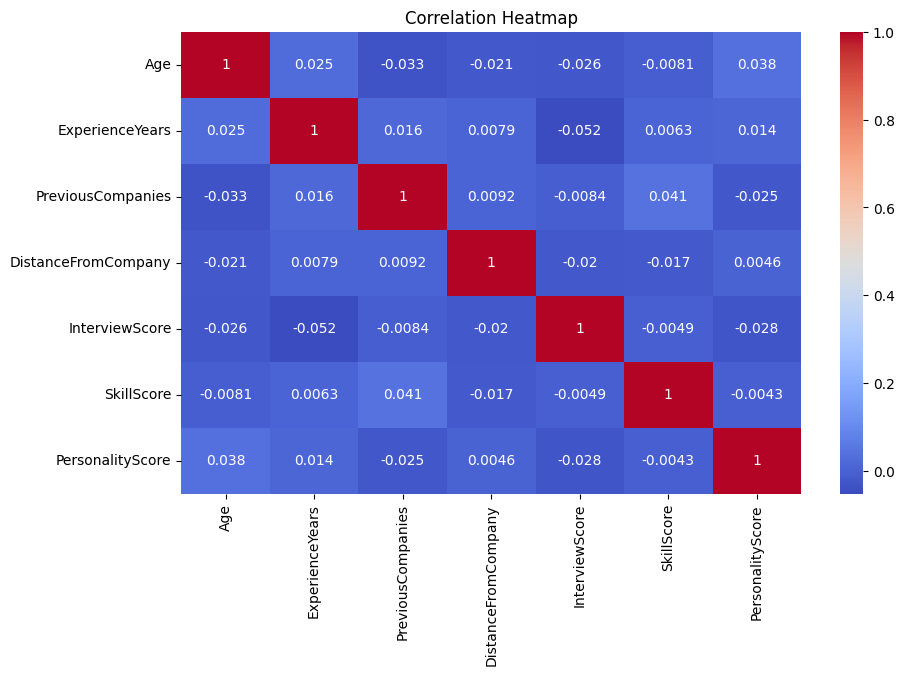

In [13]:
# heatmap korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

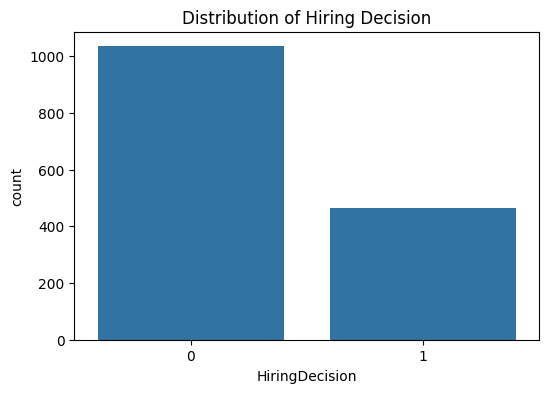

In [14]:
# cek fitur imbalance pada label target hiring decision
plt.figure(figsize=(6, 4))
sns.countplot(x='HiringDecision', data=df)
plt.title('Distribution of Hiring Decision')
plt.show()

In [15]:
# print presentase imbalance dari label target hiring decision
print(df['HiringDecision'].value_counts(normalize=True) * 100)

HiringDecision
0    69.0
1    31.0
Name: proportion, dtype: float64


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1500 non-null   int64  
 1   Gender               1500 non-null   int64  
 2   EducationLevel       1500 non-null   int64  
 3   ExperienceYears      1500 non-null   int64  
 4   PreviousCompanies    1500 non-null   int64  
 5   DistanceFromCompany  1500 non-null   float64
 6   InterviewScore       1500 non-null   int64  
 7   SkillScore           1500 non-null   int64  
 8   PersonalityScore     1500 non-null   int64  
 9   RecruitmentStrategy  1500 non-null   int64  
 10  HiringDecision       1500 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 129.0 KB


In [17]:
#cek duplikat
df.duplicated().sum()

np.int64(0)

In [18]:
df.describe()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,35.148667,0.492000,2.188000,7.694000,3.00200,25.505379,50.564000,51.116000,49.387333,1.893333,0.310000
std,9.252728,0.500103,0.862449,4.641414,1.41067,14.567151,28.626215,29.353563,29.353201,0.689642,0.462647
min,20.000000,0.000000,1.000000,0.000000,1.00000,1.031376,0.000000,0.000000,0.000000,1.000000,0.000000
25%,27.000000,0.000000,2.000000,4.000000,2.00000,12.838851,25.000000,25.750000,23.000000,1.000000,0.000000
50%,35.000000,0.000000,2.000000,8.000000,3.00000,25.502239,52.000000,53.000000,49.000000,2.000000,0.000000
75%,43.000000,1.000000,3.000000,12.000000,4.00000,37.737996,75.000000,76.000000,76.000000,2.000000,1.000000
max,50.000000,1.000000,4.000000,15.000000,5.00000,50.992462,100.000000,100.000000,100.000000,3.000000,1.000000


In [19]:
# uji t test untuk fitur numerik
from scipy import stats
for col in num_cols:
    hired = df[df['HiringDecision'] == 1][col]
    not_hired = df[df['HiringDecision'] == 0][col]
    t_stat, p_value = stats.ttest_ind(hired, not_hired)
    print(f'T-test for {col}: t-statistic = {t_stat:.10f}, p-value = {p_value:.16f}')
    if p_value < 0.05:
        print(f'  -> Significant difference in {col} between hired and not hired (p < 0.05)')
    else:
        print(f'  -> No significant difference in {col} between hired and not hired (p >= 0.05)')


T-test for Age: t-statistic = 0.0715955022, p-value = 0.9429333766900835
  -> No significant difference in Age between hired and not hired (p >= 0.05)
T-test for ExperienceYears: t-statistic = 4.7769690115, p-value = 0.0000019539247921
  -> Significant difference in ExperienceYears between hired and not hired (p < 0.05)
T-test for PreviousCompanies: t-statistic = 1.7055908077, p-value = 0.0882915990802465
  -> No significant difference in PreviousCompanies between hired and not hired (p >= 0.05)
T-test for DistanceFromCompany: t-statistic = -0.6499709603, p-value = 0.5158106383232148
  -> No significant difference in DistanceFromCompany between hired and not hired (p >= 0.05)
T-test for InterviewScore: t-statistic = 5.7145507980, p-value = 0.0000000132489787
  -> Significant difference in InterviewScore between hired and not hired (p < 0.05)
T-test for SkillScore: t-statistic = 8.0515296826, p-value = 0.0000000000000017
  -> Significant difference in SkillScore between hired and not hi

In [20]:
# kategorikal chi square
from scipy.stats import chi2_contingency
for col in cat_cols:
    contingency_table = pd.crosstab(df[col], df['HiringDecision'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f'Chi-square test for {col}: chi2 = {chi2:.10f}, p-value = {p:.200f}')
    if p < 0.05:
        print(f'  -> Significant association between {col} and HiringDecision (p < 0.05)')
    else:
        print(f'  -> No significant association between {col} and HiringDecision (p >= 0.05)')


Chi-square test for Gender: chi2 = 0.0009776541, p-value = 0.97505624092456311124976764403982087969779968261718750000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
  -> No significant association between Gender and HiringDecision (p >= 0.05)
Chi-square test for EducationLevel: chi2 = 103.6746891896, p-value = 0.00000000000000000000025190323277589304132766103274650912631354441326531525047926129631803426889291586121544241905212402343750000000000000000000000000000000000000000000000000000000000000000000000000000
  -> Significant association between EducationLevel and HiringDecision (p < 0.05)
Chi-square test for RecruitmentStrategy: chi2 = 489.6813086798, p-value = 0.00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000004645739720431345829456101735102532682645682331095024667245378330315132293497743805320262196267
  -> Significant association 

In [21]:
# cramer v
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    if min_dim == 0:
        return 0.0
    return np.sqrt(chi2 / (n * min_dim))

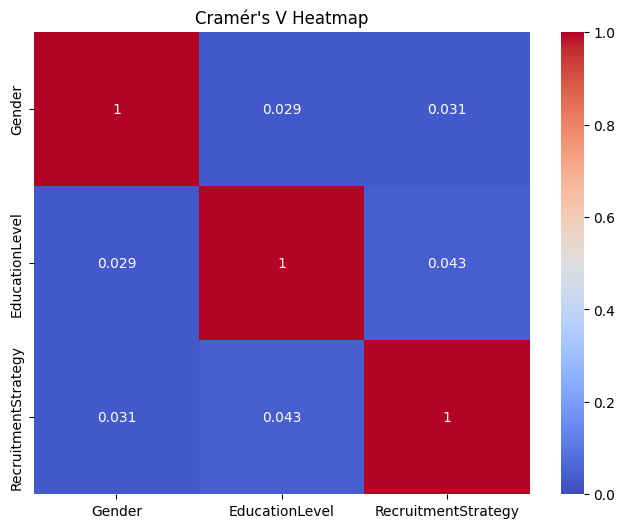

In [22]:
# heatmap cramer v
cramer_v_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols)
for col1 in cat_cols:
    for col2 in cat_cols:
        cramer_v_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])
cramer_v_matrix = cramer_v_matrix.astype(float)
plt.figure(figsize=(8, 6))
sns.heatmap(cramer_v_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Cramér's V Heatmap")
plt.show()

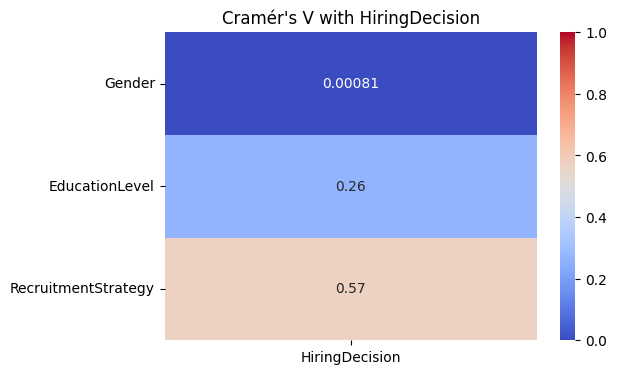

In [23]:
#heatmap cramer v dengan target
plt.figure(figsize=(6, 4))
cramer_v_target = pd.DataFrame(index=cat_cols, columns=['HiringDecision'])
for col in cat_cols:
    cramer_v_target.loc[col, 'HiringDecision'] = cramers_v(df[col], df['HiringDecision'])
cramer_v_target = cramer_v_target.astype(float)
sns.heatmap(cramer_v_target, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Cramér's V with HiringDecision")
plt.show()

In [24]:
# presentase label target
print(df['HiringDecision'].value_counts(normalize=True) * 100)


HiringDecision
0    69.0
1    31.0
Name: proportion, dtype: float64


In [ ]:
# 